
# Install necessary libraries if not already installed
---



In [2]:
!pip install -q scikit-learn graphviz

# Import required libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import graphviz

# Step 1: Download the dataset from Kaggle

In [4]:
!kaggle datasets download -d noodulz/pokemon-dataset-1000

Dataset URL: https://www.kaggle.com/datasets/noodulz/pokemon-dataset-1000
License(s): CC0-1.0
 99% 777M/785M [00:12<00:00, 104MB/s] 
100% 785M/785M [00:12<00:00, 64.5MB/s]


# Step 2: Unzip the dataset

In [5]:
!unzip pokemon-dataset-1000.zip -d pokemon_data

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: pokemon_data/pokemon-dataset-1000/train/tentacool/tentacool_7.png  
  inflating: pokemon_data/pokemon-dataset-1000/train/tentacool/tentacool_8.png  
  inflating: pokemon_data/pokemon-dataset-1000/train/tentacruel/tentacruel_10.png  
  inflating: pokemon_data/pokemon-dataset-1000/train/tentacruel/tentacruel_11.png  
  inflating: pokemon_data/pokemon-dataset-1000/train/tentacruel/tentacruel_12.png  
  inflating: pokemon_data/pokemon-dataset-1000/train/tentacruel/tentacruel_13.png  
  inflating: pokemon_data/pokemon-dataset-1000/train/tentacruel/tentacruel_14.png  
  inflating: pokemon_data/pokemon-dataset-1000/train/tentacruel/tentacruel_15.png  
  inflating: pokemon_data/pokemon-dataset-1000/train/tentacruel/tentacruel_16.png  
  inflating: pokemon_data/pokemon-dataset-1000/train/tentacruel/tentacruel_17.png  
  inflating: pokemon_data/pokemon-dataset-1000/train/tentacruel/tentacruel_18.png  
  in

# Step 3: Load the dataset

In [6]:
file_path = 'pokemon_data/pokemon-dataset-1000/metadata.csv'
data = pd.read_csv(file_path)

In [7]:
data.sample(10)

,label,image_path,hp,attack,defense,special-attack,special-defense,speed
14046,meditite,dataset/meditite/meditite_30.png,30,40,55,40,55,60
13594,mankey,dataset/mankey/mankey_26.png,40,80,35,35,45,70
7001,feebas,dataset/feebas/feebas_12.png,20,15,20,10,55,80
4049,copperajah,dataset/copperajah/copperajah_6.png,122,130,69,80,69,30
11816,landorus-incarnate,dataset/landorus-incarnate/landorus-incarnate_...,89,125,90,115,80,101
6300,ekans,dataset/ekans/ekans_13.png,35,60,44,40,54,55
18097,qwilfish,dataset/qwilfish/qwilfish_7.png,65,95,85,55,55,85
13163,magearna,dataset/magearna/magearna_6.png,80,95,115,130,115,65
11322,kirlia,dataset/kirlia/kirlia_7.png,38,35,35,65,55,50
4991,deoxys-normal,dataset/deoxys-normal/deoxys-normal_34.png,50,150,50,150,50,150


In [8]:
data.shape

(26539, 8)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26539 entries, 0 to 26538
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   label            26539 non-null  object
 1   image_path       26539 non-null  object
 2   hp               26539 non-null  int64 
 3   attack           26539 non-null  int64 
 4   defense          26539 non-null  int64 
 5   special-attack   26539 non-null  int64 
 6   special-defense  26539 non-null  int64 
 7   speed            26539 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.6+ MB


In [10]:
data.describe()

,hp,attack,defense,special-attack,special-defense,speed
count,26539.000000,26539.000000,26539.000000,26539.000000,26539.000000,26539.000000
mean,68.587739,75.302536,70.922454,68.771167,69.292098,65.911602
std,26.747434,29.400800,29.670792,28.896302,27.069887,27.884056
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000
50%,65.000000,75.000000,65.000000,65.000000,65.000000,65.000000
75%,80.000000,95.000000,87.000000,90.000000,85.000000,85.000000
max,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000


In [11]:
data.head()

,label,image_path,hp,attack,defense,special-attack,special-defense,speed
0,abomasnow,dataset/abomasnow/abomasnow_8.png,90,92,75,92,85,60
1,abomasnow,dataset/abomasnow/abomasnow_18.png,90,92,75,92,85,60
2,abomasnow,dataset/abomasnow/abomasnow_11.png,90,92,75,92,85,60
3,abomasnow,dataset/abomasnow/abomasnow_16.png,90,92,75,92,85,60
4,abomasnow,dataset/abomasnow/abomasnow_9.png,90,92,75,92,85,60


In [12]:
data.columns

Index(['label', 'image_path', 'hp', 'attack', 'defense', 'special-attack',
       'special-defense', 'speed'],
      dtype='object')

In [13]:
data.isnull().sum()

,0
label,0
image_path,0
hp,0
attack,0
defense,0
special-attack,0
special-defense,0
speed,0


# Step 4: Preprocess the dataset
### Encode the 'label' column

In [14]:
data['label'].unique()

array(['abomasnow', 'abra', 'absol', 'accelgor', 'aegislash-shield',
       'aerodactyl', 'aggron', 'aipom', 'alakazam', 'alcremie',
       'alomomola', 'altaria', 'amaura', 'ambipom', 'amoonguss',
       'ampharos', 'annihilape', 'anorith', 'appletun', 'applin',
       'araquanid', 'arbok', 'arboliva', 'arcanine', 'arceus', 'archen',
       'archeops', 'arctibax', 'arctovish', 'arctozolt', 'ariados',
       'armaldo', 'armarouge', 'aromatisse', 'aron', 'arrokuda',
       'articuno', 'audino', 'aurorus', 'avalugg', 'axew', 'azelf',
       'azumarill', 'azurill', 'bagon', 'baltoy', 'banette', 'barbaracle',
       'barboach', 'barraskewda', 'basculegion-male',
       'basculin-red-striped', 'bastiodon', 'baxcalibur', 'bayleef',
       'beartic', 'beautifly', 'beedrill', 'beheeyem', 'beldum',
       'bellibolt', 'bellossom', 'bellsprout', 'bergmite', 'bewear',
       'bibarel', 'bidoof', 'binacle', 'bisharp', 'blacephalon',
       'blastoise', 'blaziken', 'blipbug', 'blissey', 'blitzle',


In [15]:
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

### Drop columns not needed for the model
### Assuming 'image_path' is not useful for the model

In [16]:
data = data.drop(columns=['image_path'])

# Define features (X) and target (y)

In [17]:
X = data[['hp', 'attack', 'defense', 'special-attack', 'special-defense', 'speed']]
y = data['label']

In [18]:
X,y

(        hp  attack  defense  special-attack  special-defense  speed
 0       90      92       75              92               85     60
 1       90      92       75              92               85     60
 2       90      92       75              92               85     60
 3       90      92       75              92               85     60
 4       90      92       75              92               85     60
 ...    ...     ...      ...             ...              ...    ...
 26534  108     100      121              81               95     95
 26535  108     100      121              81               95     95
 26536  108     100      121              81               95     95
 26537  108     100      121              81               95     95
 26538  108     100      121              81               95     95
 
 [26539 rows x 6 columns],
 0          0
 1          0
 2          0
 3          0
 4          0
         ... 
 26534    999
 26535    999
 26536    999
 26537    999
 26

# Data visualization
### Pair plot to visualize relationships

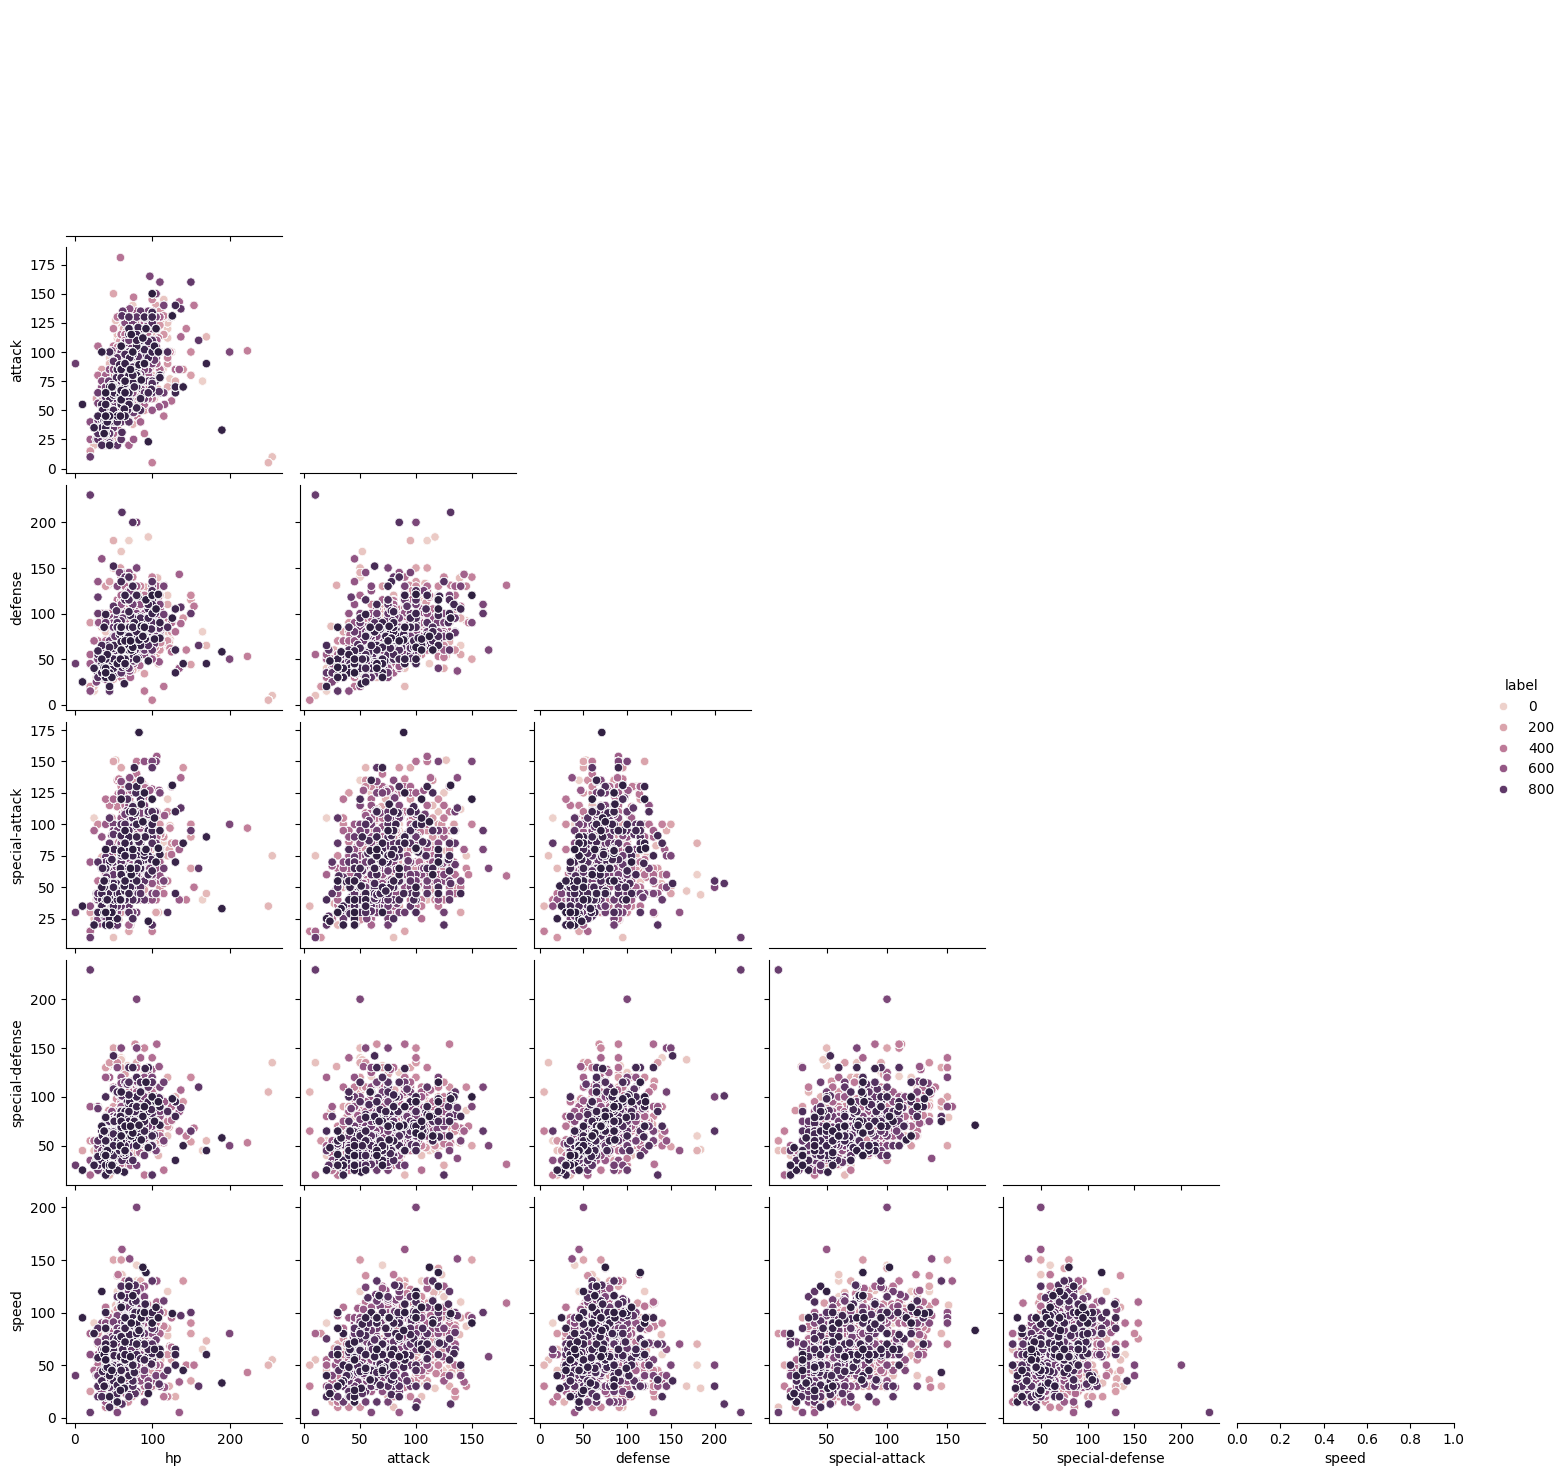

In [19]:
visual_data = X.copy()
visual_data['label'] = y
sns.pairplot(visual_data, hue='label', diag_kind='kde', corner=True)
plt.show()

# Correlation heatmap

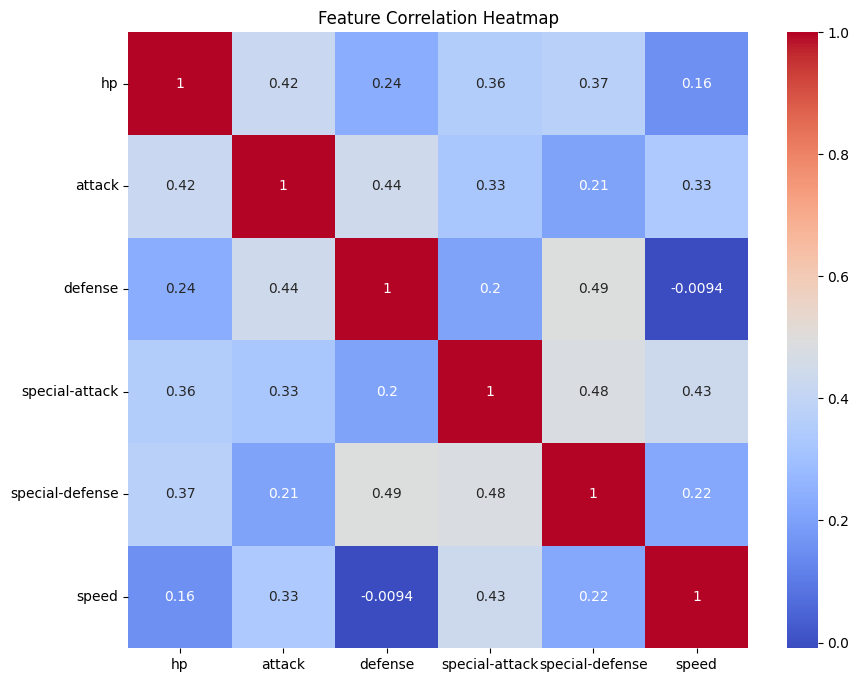

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# PCA for dimensionality reduction (2D visualization)

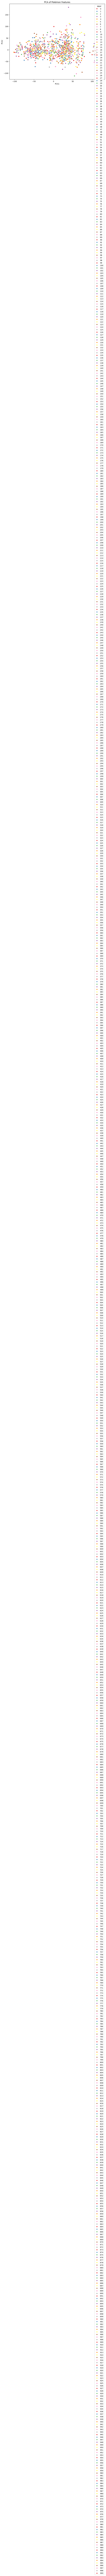

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_data = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_data['label'] = y
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_data, x='PCA1', y='PCA2', hue='label', palette='Set1')
plt.title("PCA of Pokémon Features")
plt.show()

# Step 5: Split the dataset

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Decision Tree model

In [23]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Step 7: Make predictions

In [24]:
y_pred = model.predict(X_test)

# Step 8: Evaluate the model

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00        11
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00        12
          16       1.00      1.00      1.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Step 9: Visualize the decision tree

In [26]:
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X.columns,
                           class_names=label_encoder.classes_,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("pokemon_tree")  # Saves the tree visualization as a file
graph.view()  # Opens the file (this will render it in Colab)

'pokemon_tree.pdf'